In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tqdm import tqdm
import random
from pylab import *
import os
import math

import torch
import torch.nn as nn
import torchvision.models as torch_models
import torchvision
from torchvision import datasets, models, transforms

In [2]:
model = torch_models.resnet18(pretrained=True)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
# Print model's state_dict
print("Model's state_dict:")
counter = 0
for param_tensor in model.state_dict():
    counter += 1
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())
    print(counter)

Model's state_dict:
conv1.weight 	 torch.Size([64, 3, 7, 7])
1
bn1.weight 	 torch.Size([64])
2
bn1.bias 	 torch.Size([64])
3
bn1.running_mean 	 torch.Size([64])
4
bn1.running_var 	 torch.Size([64])
5
bn1.num_batches_tracked 	 torch.Size([])
6
layer1.0.conv1.weight 	 torch.Size([64, 64, 3, 3])
7
layer1.0.bn1.weight 	 torch.Size([64])
8
layer1.0.bn1.bias 	 torch.Size([64])
9
layer1.0.bn1.running_mean 	 torch.Size([64])
10
layer1.0.bn1.running_var 	 torch.Size([64])
11
layer1.0.bn1.num_batches_tracked 	 torch.Size([])
12
layer1.0.conv2.weight 	 torch.Size([64, 64, 3, 3])
13
layer1.0.bn2.weight 	 torch.Size([64])
14
layer1.0.bn2.bias 	 torch.Size([64])
15
layer1.0.bn2.running_mean 	 torch.Size([64])
16
layer1.0.bn2.running_var 	 torch.Size([64])
17
layer1.0.bn2.num_batches_tracked 	 torch.Size([])
18
layer1.1.conv1.weight 	 torch.Size([64, 64, 3, 3])
19
layer1.1.bn1.weight 	 torch.Size([64])
20
layer1.1.bn1.bias 	 torch.Size([64])
21
layer1.1.bn1.running_mean 	 torch.Size([64])
22
layer1.1

In [4]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)

Using cache found in /Users/dj/.cache/torch/hub/pytorch_vision_v0.10.0


In [56]:
# torch.hub.list('pytorch/vision')

In [5]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
proto_path = '/Users/dj/Documents/GitHub/Master_Thesis/Code/SynDat_HBL/prototypes/prototypes-2d-1000c.npy'
protos = np.load(proto_path)
radius = 1.0 / math.sqrt(1.0)
classpolars = protos * radius

In [29]:
classpolars[[2,7,13]]

array([[0.99992104, 0.01256604],
       [0.99903293, 0.04396812],
       [0.99666593, 0.08159061]])

In [52]:
from models.cifar import resnet as resnet_cifar 
model = resnet_cifar.ResNet(32, 10, 1, classpolars) # The one from Mettes
print(type(model))

<class 'models.cifar.resnet.ResNet'>


In [24]:
print(model.polars)

[[ 1.          0.        ]
 [ 0.99998026  0.00628314]
 [ 0.99992104  0.01256604]
 ...
 [ 0.99982235 -0.01884844]
 [ 0.99992104 -0.01256604]
 [ 0.99998026 -0.00628314]]


In [7]:
print(model)

ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fals

# Pytorch Tutorial

#### Finetuning the convnet

In [9]:
model_ft = torch_models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2) # Change 2 with args.output_dims

In [10]:
print(model_ft)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Change one particular layer

In [51]:
model_ft = torch_models.resnet18(pretrained=True)
# model.load_state_dict(state_dict, strict=True)
for name, child in model.named_children():
        for x, y in child.named_children():
            print(name,x)

model conv1
model bn1
model relu
model maxpool
model layer1
model layer2
model layer3
model layer4
model avgpool
model fc


In [53]:
model_ft.features[0]

AttributeError: 'ResNet' object has no attribute 'features'

In [54]:
model_ft.conv1 # Replace it like in the pytorch forum:

# net = models.SqueezeNet()
# net.features[3] = nn.Conv2d(96, 128, 1, 1) # Replace this with your custom layer

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

#### ConvNet as fixed feature extractor

In [40]:
model_conv = torch_models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

In [43]:
model_conv = torch_models.resnet18(pretrained=True)
ct = 0
for child in model_conv.children():
    ct += 1
    if ct > 1:
        for param in child.parameters():
            param.requires_grad = False
# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

In [44]:
for param in model_conv.parameters():
    print(param.requires_grad)

True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True


# Test from file

In [45]:
from models.imnet import resnet_18_pre_trained as resnet_imnet
model = resnet_imnet.ResNet18(10)

ResNet 18 pretrained is being loaded.


In [39]:
for param in model.parameters():
    print(param.requires_grad)

True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True


# Test

In [36]:
from models.imnet.resnet_18_pre_trained import get_model, predict
model = get_model(10) # The one from Mettes

ImportError: cannot import name 'get_model' from 'models.imnet.resnet_18_pre_trained' (/Users/dj/Documents/GitHub/Master_Thesis/Code/ImageNet_HBL/models/imnet/resnet_18_pre_trained.py)

In [11]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [41]:
def get_model(output_dims = 10):
        model = torch_models.resnet18(pretrained=True) # Option 2
        for param in model.parameters():
            param.requires_grad = False
        # Parameters of newly constructed modules have requires_grad=True by default
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, output_dims)
        return model

In [42]:
test = get_model(123)

In [43]:
print(test)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [2]:
from models.imnet import resnet_18_pre_trained as resnet_imnet
model_test = resnet_imnet.ResNet18(1234, classpolars)

In [51]:
model_test = resnet_imnet.ResNet18(1234, classpolars)
print(type(model_test))

ResNet 18 pretrained is being loaded.
<class 'models.imnet.resnet_18_pre_trained.ResNet18'>


In [9]:
print(model_test)

ResNet18(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

# Test about the Images

In [47]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(64), # 224
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256), # 256
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [48]:
type(dataloaders)

dict

In [49]:
dataloaders['train'].dataset[0][0].shape

torch.Size([3, 64, 64])

/opt/anaconda3/envs/MasterThesis/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


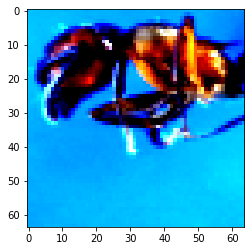

In [50]:
s = 0
image = torch.tensor(dataloaders['train'].dataset[0][s]) #34
# print(dataloaders['val'].dataset[0][s])
plt.imshow(image.permute(1, 2, 0)  )